In [24]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

### Decoding reviews to English

In [6]:
word_index = imdb.get_word_index()

# Reverses it, mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# Decodes the review
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Encoding the integer sentences into a binary matrix

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Creates a matrix of zeroes
    
    # Sets specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)  # Vectorized training data
x_test = vectorize_sequences(test_data)  # Vectorized test data

y_train = np.asarray(train_labels).astype('float32')  # Vectorized training labels
y_test = np.asarray(test_labels).astype('float32')  # Vectorized test labels

In [10]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


### The model definition

In [13]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Validate model

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Train the model

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 445us/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.7008 - val_acc: 0.8664
Epoch 2/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.0034 - acc: 0.9993 - val_loss: 0.7220 - val_acc: 0.8659
Epoch 3/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.7506 - val_acc: 0.8647
Epoch 4/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.7776 - val_acc: 0.8642
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 7.0858e-04 - acc: 0.9999 - val_loss: 0.7995 - val_acc: 0.8639
Epoch 6/20
15000/15000 [==============================] - 2s 160us/step - loss: 6.1306e-04 - acc: 0.9999 - val_loss: 0.8367 - val_acc: 0.8629
Epoch 7/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])

### Ploting the training and validation loss

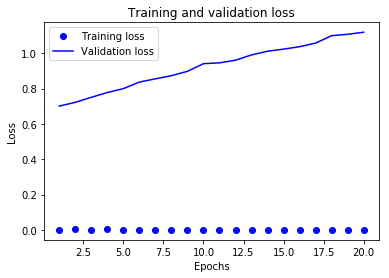

In [27]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()